Department of Physics, University of Pisa (AA 2023-2024)

### Multimessenger Physics Laboratory tutorial series



# Tutorial 02 - Reading CCD or CMOS Color Frames
#### (M. Razzano, Mar 12, 2024)

In this tutorial we will see how to read images produced by a color CCD or CMOS. We will also see how to manipulate them, e.g. to see histograms, and combine them.

## Basic Setup 

### Importing packages
First of all, we import the relevant Python packages

In [25]:
#first, do some basic imports
import numpy as np
import os

#plotting
import matplotlib.pyplot as plt
%matplotlib inline
import cv2

#Astropy import
from astropy.nddata import CCDData
from astropy.io import fits

#ccdproc import
import ccdproc

### Definition of relevant directories
We can define these directories:
* work_dir: the *working directory*, where the notebook is;
* main_dir: the *main directory* of the project;
* data_dir: the *data directory* containing the data

In [26]:
#define Work dir
work_dir = os.getcwd()

#Main Dir
main_dir = os.path.dirname(work_dir)

#Data Dir
data_dir = os.path.join(main_dir,"testdata")

print("Main directory is %s" % main_dir)
print("Data directory is %s" % data_dir)

Main directory is /Users/razzano/AstroWork/experience-ccd-optical-template
Data directory is /Users/razzano/AstroWork/experience-ccd-optical-template/testdata


## Read Color images
This is the case of the images produced by color CCDs or CMOS. The data is stored in a NxM matrix, each element containing the ADUs of a pixel.

### Display Header with Astropy
We can now display the header using *Astropy*

In [27]:
#Explore the structure of the FITS file
single_cmos_color_flat_filename = "flat_sample_ASI178_0.1sec.fits"

hdu_list = fits.open(os.path.join(data_dir,single_cmos_color_flat_filename))
hdu_list.info()

Filename: /Users/razzano/AstroWork/experience-ccd-optical-template/testdata/flat_sample_ASI178_0.1sec.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   (3096, 2080)   int16 (rescales to uint16)   


### Display Header with Astropy
We can now display the header using *Astropy*

In [28]:
print("Print header with Astropy:")
header = fits.getheader(os.path.join(data_dir,single_cmos_color_flat_filename),0)

print(header)

Print header with Astropy:
SIMPLE  =                    T / file does conform to FITS standard             BITPIX  =                   16 / number of bits per data pixel                  NAXIS   =                    2 / number of data axes                            NAXIS1  =                 3096 / length of data axis 1                          NAXIS2  =                 2080 / length of data axis 2                          EXTEND  =                    T / FITS dataset may contain extensions            COMMENT   FITS (Flexible Image Transport System) format is defined in 'AstronomyCOMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H BZERO   =                32768 / physical = BZERO + BSCALE*array_value          BSCALE  =                    1 / physical = BZERO + BSCALE*array_value          XBINNING=                    1 / Binning factor in width                        YBINNING=                    1 / Binning factor in height                       EXPOINUS=    

### Display Header with CCDproc
We can now open the file and display the header using *CCDproc*. The result is easier to read.

In [29]:
single_cmos_flat_frame = CCDData.read(os.path.join(data_dir,single_cmos_color_flat_filename),hdu=0,unit="adu")

print("Print header with CCDProc:")
single_cmos_flat_frame.header

Print header with CCDProc:


SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   16 / number of bits per data pixel                  
NAXIS   =                    2 / number of data axes                            
NAXIS1  =                 3096 / length of data axis 1                          
NAXIS2  =                 2080 / length of data axis 2                          
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
BZERO   =                32768 / physical = BZERO + BSCALE*array_value          
BSCALE  =                    1 / physical = BZERO + BSCALE*array_value          
XBINNING=                    1 / Binning factor in width                        
YBINNING=                    1 / Binning factor in height                       
EXPOINUS=               1000

## Convert to RGB color image
This is the case of the images produced by color CCDs or CMOS. The data is stored in a NxM matrix, each element containing the ADUs of a pixel.
However, in the case of the color images, FITS files do not store data in a RGB format, i.e. a NxM matrix for each color resulting in a 3xNxM cube. FITS contains always a NxM matrix, and to convert to the usual RGB color images we need to apply an operation called *Debayering*, that can be performed with the *opencv* Python package.

First of all, let us explore the list of HDUs of the fits file. In this case we consider a flat field frame

In [30]:
single_cmos_flat_frame.data
print("Shape of data array is:")
single_cmos_flat_frame.data.shape

Shape of data array is:


(2080, 3096)

### Debayering, or how to read FITS color frames
As you can see from previous output, the shape of the data array is a single matrix. However, since the CCD has a color sensor, you should expect 
a cube of 3 matrices, one for each color (e.g. RGB, R=red, G=Green, B=Blue).
Unfortunately, FITS standard allows only single matrices, related to monochromatic images.

Color data can be encoder to a single matrix via the so called Bayer pattern, a color image encoding that allows to encode color images to a monochromatic image. The inverse process is called Debayering and can be performed via different image-processing libraries including OpenCV.

The debayering routing requires the knowledge of how the color pixel are arranged in the sensor array, that is usually encoded in the FITS header, e.g. in the key *BAYERPAT*.
We can now read this pattern and apply the correct OpenCV Debayering key (in this case RGGB to RGB)

In [31]:
#Debayer
bayer_pattern = single_cmos_flat_frame.header["BAYERPAT"]
print("Bayer Pattern is %s" % bayer_pattern)

Bayer Pattern is RGGB


In [32]:
#We can now apply the Debayer pattern in the cvtColor function of openCV
rgb = cv2.cvtColor(single_cmos_flat_frame.data, cv2.COLOR_BAYER_RGGB2RGB)

print("Shape of the RGB Debayered data frame. Now it is a 3-layered cube containing the 3 color matrices!")
rgb.shape

Shape of the RGB Debayered data frame. Now it is a 3-layered cube containing the 3 color matrices!


(2080, 3096, 3)

In [33]:
#We can now split into the 3 colors
#The order is reversed, is a OpenCV convention...

blue_frame, green_frame, red_frame = cv2.split(rgb)

## Display images and histograms

### Display image and histogram of a single color
We can now select a color, e.g. red and display the frame image, the histogram and evaluate the statistics

Text(0.5, 0.95, 'min=1344.00\nmax=14348.00\nmean=7522.60\nmedian=8686.00\nstd=4112.40')

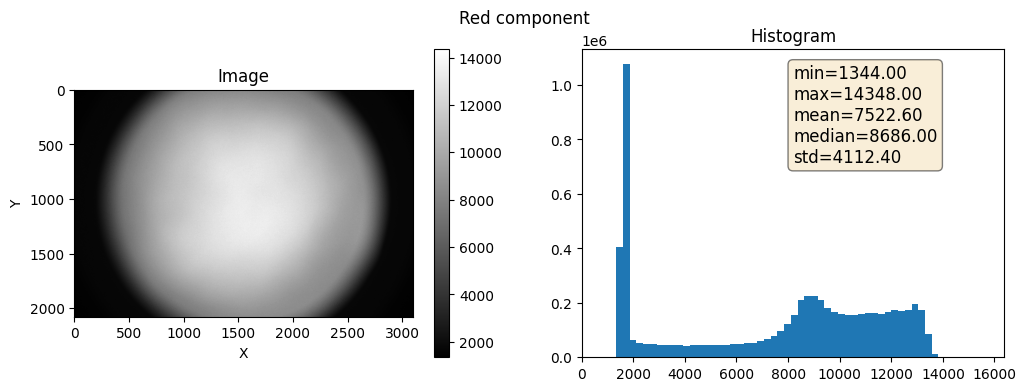

In [34]:
#Create an array of subplots

r_fig = plt.figure("red",figsize=(12,4))
r_fig.suptitle("Red component")

#Display image
r_ax1 = plt.subplot(1, 2, 1)
r_ax1.set_title("Image")
r_ax1.set_xlabel("X")
r_ax1.set_ylabel("Y")

r_img = r_ax1.imshow(red_frame, cmap='gray')
plt.colorbar(r_img)

#Display histogram of image counts
r_ax2 = plt.subplot(1, 2, 2)
r_ax2.set_title("Histogram")
r_ax2.hist(red_frame.flatten(),bins=50)
r_ax2.set_xlim([0,2**14])

#Get some statistics
r_min = np.min(red_frame)
r_max = np.max(red_frame)
r_mean = np.mean(red_frame)
r_std = np.std(red_frame)
r_median = np.median(red_frame)

#Place in a text box
r_text = '\n'.join((
    r'min=%.2f' % (r_min, ),
    r'max=%.2f' % (r_max, ),
    r'mean=%.2f' % (r_mean, ),
    r'median=%.2f' % (r_median, ),
    r'std=%.2f' % (r_std, )))


#Place the text box in upper left (using axes coordinates)
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
r_ax2.text(0.5, 0.95, r_text, transform=r_ax2.transAxes, fontsize=12,
        verticalalignment='top', bbox=props)

### Display all colors
We can now plot all colors using a for cycle

In [35]:
#define a list of frames and relative label
rgb_list = [blue_frame, green_frame, red_frame]
rgb_label = ["Blue", "Green", "Red"]

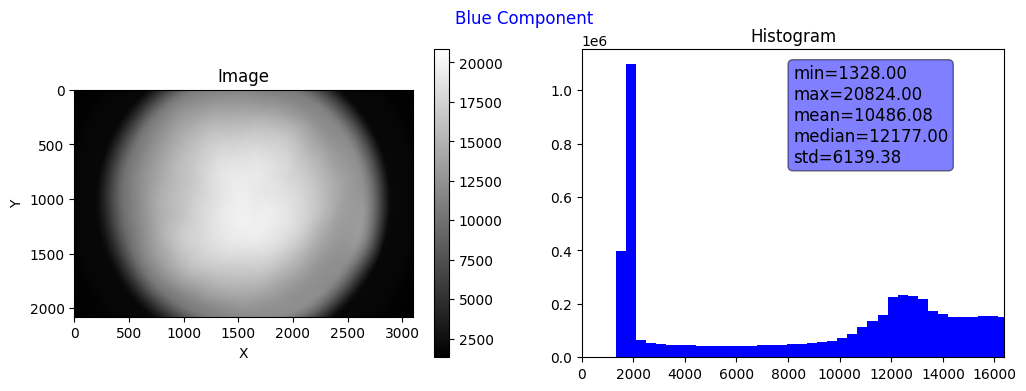

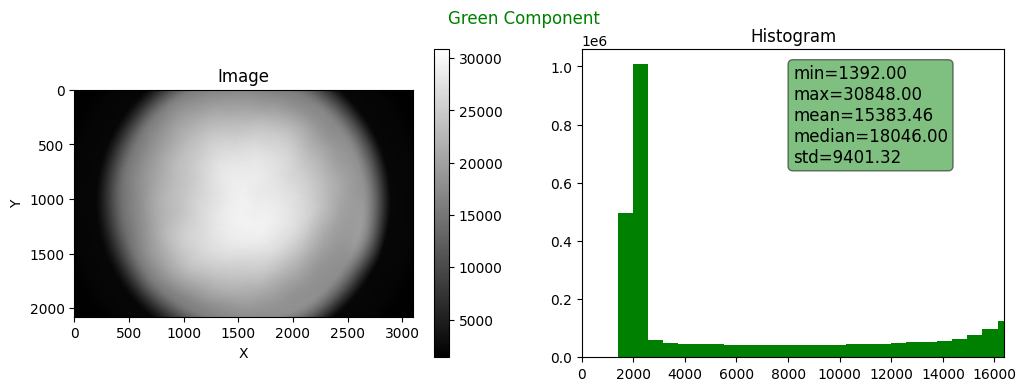

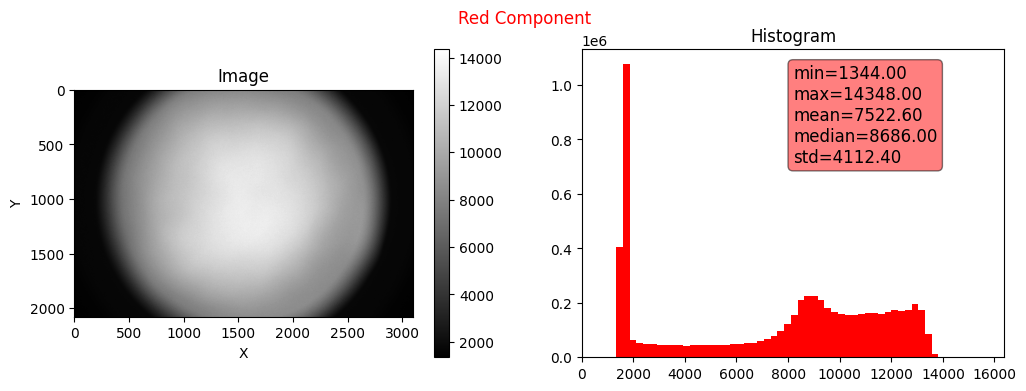

In [36]:
#run the for over colors:

for ci in range(len(rgb_list)):
    c_frame = rgb_list[ci]
    c_label = rgb_label[ci]

    #Create the figure
    c_fig = plt.figure(c_label,figsize=(12,4))
    c_fig.suptitle("%s Component" % c_label,color=c_label)

    #Display image
    c_ax1 = plt.subplot(1, 2, 1)
    c_ax1.set_title("Image")
    c_ax1.set_xlabel("X")
    c_ax1.set_ylabel("Y")

    c_img = c_ax1.imshow(c_frame, cmap='gray')
    plt.colorbar(c_img)

    #Display histogram of image counts
    c_ax2 = plt.subplot(1, 2, 2)
    c_ax2.set_title("Histogram")
    c_ax2.hist(c_frame.flatten(),bins=50,facecolor=c_label)
    c_ax2.set_xlim([0,2**14])


    #Get some statistics
    c_min = np.min(c_frame)
    c_max = np.max(c_frame)
    c_mean = np.mean(c_frame)
    c_std = np.std(c_frame)
    c_median = np.median(c_frame)

    #Place in a text box
    c_text = '\n'.join((
    r'min=%.2f' % (c_min, ),
    r'max=%.2f' % (c_max, ),
    r'mean=%.2f' % (c_mean, ),
    r'median=%.2f' % (c_median, ),
    r'std=%.2f' % (c_std, )))


    #Place the text box in upper left (using axes coordinates)
    props = dict(boxstyle='round', facecolor=c_label, alpha=0.5)
    c_ax2.text(0.5, 0.95, c_text, transform=c_ax2.transAxes, fontsize=12,
            verticalalignment='top', bbox=props)


### A cosmetic note on displaying RGB channels
You can also display RGB channels by setting to 0 the matrix layer other than the color you would like to display

Text(0, 0.5, 'Y')

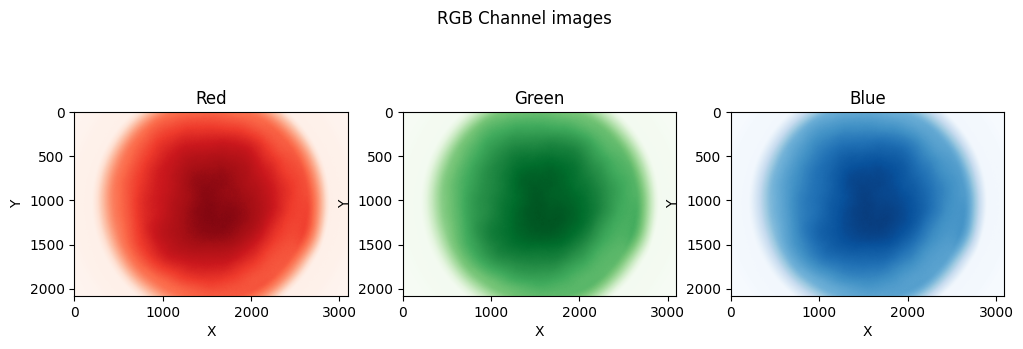

In [37]:
#first create a matrix with all zeros:
	
zeros = np.zeros(red_frame.shape, red_frame.dtype)

redRGB = rgb[:,:,0]
greenRGB = rgb[:,:,1]
blueRGB = rgb[:,:,2]

#Create the figure
rgb_fig = plt.figure(c_label,figsize=(12,4))
rgb_fig.suptitle("RGB Channel images")

#Display image
c_ax1 = plt.subplot(1, 3, 1)
plt.imshow(redRGB,cmap="Reds")
plt.title("Red")
plt.xlabel("X")
plt.ylabel("Y")

c_ax2 = plt.subplot(1, 3, 2)
plt.imshow(greenRGB,cmap="Greens")
plt.title("Green")
plt.xlabel("X")
plt.ylabel("Y")

c_ax3 = plt.subplot(1, 3, 3)
plt.imshow(greenRGB,cmap="Blues")
plt.title("Blue")
plt.xlabel("X")
plt.ylabel("Y")